# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("training feature input", type(X_train), X_train.shape, X_train.dtype)
print("training label input", type(y_train), y_train.shape, y_train.dtype)
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

training feature input <class 'numpy.ndarray'> (34799, 32, 32, 3) uint8
training label input <class 'numpy.ndarray'> (34799,) uint8


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train,y_test,y_valid))))

# Get data size and shape and classes info
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

([<matplotlib.axis.XTick at 0x7f5728c5a390>,
 <a list of 5 Text xticklabel objects>)

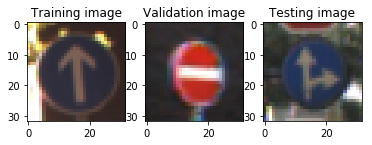

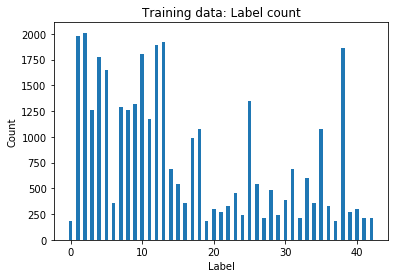

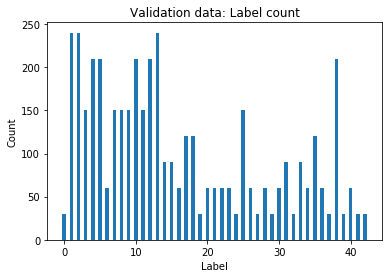

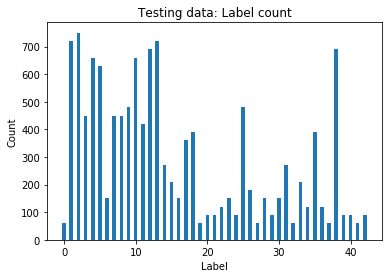

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# Plot Train/Validate/Test image
plt.figure(1)
plt.subplot(131)
plt.imshow(X_train[random.randint(0,X_train.shape[0])])
plt.title("Training image")
plt.subplot(132)
plt.imshow(X_valid[random.randint(0,X_valid.shape[0])])
plt.title("Validation image")
plt.subplot(133)
plt.imshow(X_test[random.randint(0,X_test.shape[0])])
plt.title("Testing image")


# Counting classes in each dataset (x-axis is a label, y-axis is a count)
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
unique_test,  counts_test  = np.unique(y_test,  return_counts=True)

width = 0.5
plt.figure(2)
plt.bar(unique_train, counts_train, width)
plt.title("Training data: Label count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(min(unique_train), max(unique_train)+1, 10.0))
plt.figure(3)
plt.bar(unique_valid, counts_valid, width)
plt.title("Validation data: Label count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(min(unique_train), max(unique_train)+1, 10.0))
plt.figure(4)
plt.bar(unique_test, counts_test, width)
plt.title("Testing data: Label count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(min(unique_train), max(unique_train)+1, 10.0))



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Normalise grayscale image done ....
Augment data ... 
  Augment Train =  35014
  Augment Test =  4625


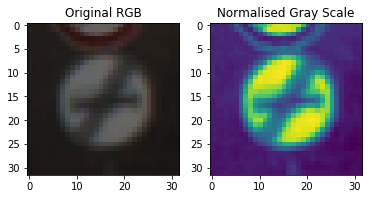

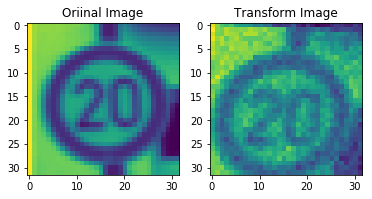

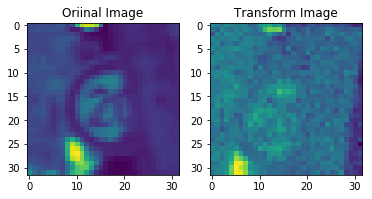

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from skimage.transform import warp, AffineTransform

def Normalise_Grayscale(ColorImage,MinMax=[0.0,1.0]):
    #new image size
    m_S  = ColorImage.shape[0] #stack
    m_W  = ColorImage.shape[1] #width
    m_H  = ColorImage.shape[2] #height
    
    GrayImage = np.zeros((m_S,m_W,m_H))
    #loop through the image batch 
    for i in range(len(ColorImage)):
        #convert to gray
        GrayImage[i] = cv2.cvtColor(ColorImage[i], cv2.COLOR_RGB2GRAY)
        
        #normalise gray image to min-max range 
        b = MinMax[1]
        a = MinMax[0]
        Xmin = np.min(GrayImage[i])
        Xmax = np.max(GrayImage[i])
        GrayImage[i] = a + (b-a)*(GrayImage[i]-Xmin)/(Xmax-Xmin)
        
        #TODO- remove noise - contrast ehnance
        
    #reshape to 4D, depth = 1
    GrayImage = GrayImage.reshape((m_S,m_W,m_H,1))
        
    return GrayImage


def Augment_ImageData(GrayImages, Labels):
    #augment with affine transform
    n_length = len(Labels)
    w = GrayImages.shape[1]
    h = GrayImages.shape[2]
    d = GrayImages.shape[3]
    plot_img = True
    for i in range(43):
        #find n images of this original label
        index =np.where(Labels[:n_length]==i)[0]
        #TODO make sure there are enough images
        for j in range(5):
            #make sure it is the same label
            assert(Labels[index[j]] == i)
            #affine transformation
            rot = random.uniform(-0.1, 0.1)
            scalex = random.uniform(1.0, 1.2)
            scaley = random.uniform(1.0, 1.2)
            tform = AffineTransform(scale=(scalex, scaley), rotation=rot, shear=0.1)
            image = warp(GrayImages[index[j]], tform.inverse, output_shape=GrayImages[index[j]].shape)
            #adding random noise to normalise gray scale
            noise = cv2.randn(np.zeros(image.shape),0,0.05)
            image = image + noise
            #concat to original data
            GrayImages = np.concatenate( (GrayImages, image.reshape(1,w,h,d)), axis=0)
            Labels = np.concatenate( (Labels,[i]) )
            
            if(plot_img):
                # Plot original
                plt.figure()
                plt.subplot(121)
                plt.imshow( GrayImages[index[j]].reshape(w,h) )
                plt.title("Oriinal Image")
                plt.subplot(122)
                plt.imshow( image.reshape(w,h) )
                plt.title("Transform Image")
                plot_img = False
        
    
    return GrayImages,Labels
    

# Plot original
plt.figure(5)
plt.subplot(121)
plt.imshow(X_train[10])
plt.title("Original RGB")

#normalise data
MinMax = [0.1,0.9]  
X_train = Normalise_Grayscale(X_train, MinMax)
X_valid = Normalise_Grayscale(X_valid, MinMax)
X_test  = Normalise_Grayscale(X_test, MinMax)
print("Normalise grayscale image done ....")
  
#plot normalised data (reshape 3D to 2D for plotting)
plt.subplot(122)
plt.imshow(X_train[10].reshape(32,32))
plt.title("Normalised Gray Scale")


#(optional- augment image data)- affine transform at least 5 images for each labels
X_train,y_train = Augment_ImageData(X_train,y_train)
X_valid,y_valid = Augment_ImageData(X_valid,y_valid)
print("Augment data ... ")
print("  Augment Train = ",len(X_train))
print("  Augment Test = ", len(X_valid))


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
            
    
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # ------------------- TODO: Layer 1 ----------------:
    # Convolutional. Input = 32x32x1. Output = 28x28x6.
    # padding valid
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    Cov_W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    Cov_b1 = tf.Variable(tf.zeros(6))
    Cov1 = tf.nn.conv2d(x, Cov_W1, strides=[1,1,1,1], padding = 'VALID') + Cov_b1
    
    # TODO: Activation (activate function)
    Cov1 = tf.nn.relu(Cov1)
    tf.add_to_collection('actv1', Cov1)

    # TODO: Max Pooling. Input = 28x28x6. Output = 14x14x6.
    Cov1 = tf.nn.max_pool(Cov1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'VALID')

    # --------------------- TODO: Layer 2 -------------- :
    # Convolutional. Input 14x14x6, Output = 10x10x16.
    Cov_W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    Cov_b2 = tf.Variable(tf.zeros(16))
    Cov2   = tf.nn.conv2d(Cov1, Cov_W2, strides=[1,1,1,1], padding = 'VALID')
    # TODO: Activation.
    Cov2 = tf.nn.relu(Cov2)
    # Add to container for later visualisation
    tf.add_to_collection('actv2', Cov2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    Cov2 = tf.nn.max_pool(Cov2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(Cov2)
    
    # ---------------------- TODO: Layer 3 --------------- :
    # Fully Connected. Input = 400. Output = 120.
    fc_W1 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc_b1 = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0,fc_W1) + fc_b1
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # ---------------------- TODO: Layer 4 --------------- :
    # Fully Connected. Input = 120. Output = 84.
    fc_W2 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc_b2 = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1,fc_W2) + fc_b2
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # --------------------- TODO: Layer 5 ---------------- :
    # Fully Connected. Input = 84. Output = 43.
    fc_W3 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc_b3 = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2,fc_W3) + fc_b3
    
    return logits



class CovNetwork(object):
    def __init__(self,EPOCHS,BATCH_SIZE, IMAGE_SIZE, OUTPUT_SIZE,RATE,\
                 TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, LeNet):
        self.EPOCHS     = EPOCHS
        self.BATCH_SIZE = BATCH_SIZE
        self.rate       = RATE
        self.model      = LeNet
        self.X_train    = TRAIN_X
        self.y_train    = TRAIN_Y
        self.X_valid    = VALID_X
        self.y_valid    = VALID_Y
        self.graph      = tf.Graph()
        with self.graph.as_default():
            self.x          = tf.placeholder(tf.float32, (None, 32, 32, 1))
            self.y          = tf.placeholder(tf.int32, (None))
            self.one_hot    = tf.one_hot(self.y, 43)  
            self.logits     = self.model(self.x)
            self.soft_max       = tf.nn.softmax(self.logits)
            self.cross_entropy  = tf.nn.softmax_cross_entropy_with_logits(self.logits, self.one_hot)
            self.loss_operation = tf.reduce_mean(self.cross_entropy)
            self.optimizer      = tf.train.AdamOptimizer(self.rate)
            self.training_operation = self.optimizer.minimize(self.loss_operation)
            self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot, 1))
            self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
            self.get_prediction     = tf.argmax(self.logits, 1)
            self.saver = tf.train.Saver()
               
        
    def Train(self):     
          
        with tf.Session(graph=self.graph) as sess:
            #TODO-load previously save training or start a new one 
            sess.run(tf.global_variables_initializer())
            num_examples = len(self.X_train)

            print("Training...")
            print()
            
            for i in range(self.EPOCHS):
                #shuffle training data for every training loop
                X_train, y_train = shuffle(self.X_train, self.y_train)   
                #Note! my own or sklearn function fail here to split the data???
                #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=42) 
                
                #(optional: augment images)
                
                
                for offset in range(0, num_examples, self.BATCH_SIZE):
                    end = offset + self.BATCH_SIZE
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                    # set place holder data X and y for training 
                    sess.run(self.training_operation, feed_dict={self.x: batch_x, self.y: batch_y})

                training_accuracy = self.Evaluate(X_train, y_train, self.BATCH_SIZE)
                validation_accuracy = self.Evaluate(X_valid, y_valid, self.BATCH_SIZE)
                print("EPOCH {} ...".format(i+1))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
        
            #Inplace Test data validation
            #test_accuracy = self.Evaluate(self.X_test, self.y_test, self.BATCH_SIZE)
            #print("Test Accuracy = {:.3f}".format(test_accuracy))
            self.saver.save(sess, './model_train')
            print("Model saved")
            
        
    def Test(self,X_test,y_test):
        with tf.Session(graph=self.graph) as sess:
            #load training model params
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            test_accuracy = self.Evaluate(X_test, y_test,self.BATCH_SIZE)
            print("Test Accuracy = {:.3f}".format(test_accuracy))

          
    def GetPrediction(self,X_data):
        with tf.Session(graph=self.graph) as sess:
            #load training model params
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            #set place holder and call prediction
            prediction = sess.run(self.get_prediction, feed_dict={self.x: X_data})   
            
        return prediction
    
    def GetPredictionUndSoftmax(self,X_data,TopGun):
        with tf.Session(graph=self.graph) as sess:
            #load training model params
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            #set place holder and run softmax to return probability of all classes
            softmax = sess.run(self.soft_max, feed_dict={self.x:X_data})
            #return softmax top n for the given test samples
            softmax_n = sess.run(tf.nn.top_k(tf.constant(softmax), k=TopGun)) 
            #return a prediction (just one) for the given test samples 
            prediction = sess.run(tf.argmax(softmax, 1))
            
        return prediction, softmax_n
   
            
        
    def Evaluate(self,X_data, y_data, BATCH_SIZE):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, feed_dict={self.x: batch_x, self.y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
            
        return total_accuracy / num_examples
    
    
    def outputFeatureMap(self, image_input, tf_activation="actv2", activation_min=-1, activation_max=-1 ,plt_num=1):
        # Here make sure to preprocess your image_input in a way your network expects
        # with size, normalization, ect if needed
        # image_input =
        # Note: x should be the same name as your network's tensorflow data placeholder variable
        # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
        with tf.Session(graph=self.graph) as sess:
            #restore data
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            #get activation function model 
            act = tf.get_collection(tf_activation)[0]
            #apply data
            activation = sess.run(act,feed_dict={self.x : image_input})
            #someway to print a variable collection
            #print(sess.run(b2))
            featuremaps = activation.shape[3]
            plt.figure(plt_num, figsize=(15,15))
            for featuremap in range(featuremaps):
                plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
                plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
                if activation_min != -1 & activation_max != -1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
                elif activation_max != -1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
                elif activation_min !=-1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
                else:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

training size after split 23783
validation size after split 15856
training class after split 43
validation class after split 43
Training...

EPOCH 1 ...
Training Accuracy = 0.266
Validation Accuracy = 0.261

EPOCH 2 ...
Training Accuracy = 0.620
Validation Accuracy = 0.611

EPOCH 3 ...
Training Accuracy = 0.739
Validation Accuracy = 0.737

EPOCH 4 ...
Training Accuracy = 0.805
Validation Accuracy = 0.798

EPOCH 5 ...
Training Accuracy = 0.873
Validation Accuracy = 0.857

EPOCH 6 ...
Training Accuracy = 0.890
Validation Accuracy = 0.878

EPOCH 7 ...
Training Accuracy = 0.913
Validation Accuracy = 0.900

EPOCH 8 ...
Training Accuracy = 0.924
Validation Accuracy = 0.911

EPOCH 9 ...
Training Accuracy = 0.933
Validation Accuracy = 0.922

EPOCH 10 ...
Training Accuracy = 0.940
Validation Accuracy = 0.927

EPOCH 11 ...
Training Accuracy = 0.950
Validation Accuracy = 0.937

EPOCH 12 ...
Training Accuracy = 0.956
Validation Accuracy = 0.943

EPOCH 13 ...
Training Accuracy = 0.959
Validation Ac

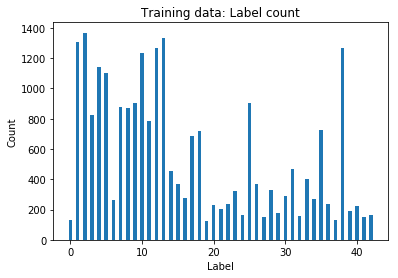

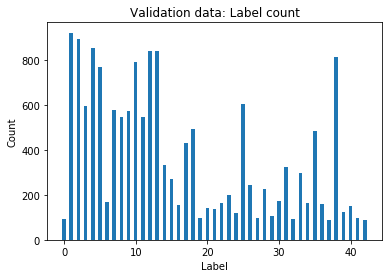

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 15                #ref 15
BATCH_SIZE = 400           #ref 300
IMAGE_SIZE = [32,32] 
OUTPUT_SIZE = 34
RATE = 0.001               #ref 0.001
#merge mixing training and validation data set
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid))
#save some memory
del X_valid, y_valid
#split data into training and validating
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

# Confirm the data is good (all labels in both data set and no bias)
print("training size after split", len(X_train))
print("validation size after split", len(X_valid))
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
print("training class after split",len(unique_train))
print("validation class after split",len(unique_valid))

width = 0.5
plt.figure(20)
plt.bar(unique_train, counts_train, width)
plt.title("Training data: Label count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(min(unique_train), max(unique_train)+1, 10.0))
plt.figure(21)
plt.bar(unique_valid, counts_valid, width)
plt.title("Validation data: Label count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(min(unique_train), max(unique_train)+1, 10.0))


DNN = CovNetwork(EPOCHS,BATCH_SIZE, IMAGE_SIZE, OUTPUT_SIZE,RATE, X_train, y_train, X_valid, y_valid, LeNet)
DNN.Train()
DNN.Test(X_test,y_test)





---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

100%|██████████| 6/6 [00:00<00:00, 280.37files/s]


17   blind-test-signs/17_A.jpg
25   blind-test-signs/25_A.jpg
1   blind-test-signs/1_A.jpg
28   blind-test-signs/28_A.jpg
35   blind-test-signs/35_A.jpeg
<class 'numpy.ndarray'> (5, 32, 32, 3) float32
<class 'numpy.ndarray'> (5,) uint8


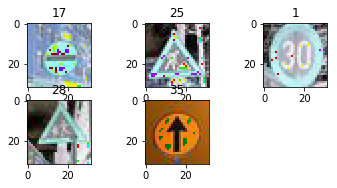

In [7]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2  ### TODO remove me when done ##
import numpy as  np ####TODO remove
import matplotlib.pyplot as plt   ###TODO remove
import os
from tqdm import tqdm
from zipfile import ZipFile
from PIL import Image

def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory, if it is skip this name
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image.load()
                    # Load image data as original 
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32)

                # Get the the letter from the filename.  This is the letter of the image.
                # split base name e.g. '17_A'- split label name '17'
                label = os.path.split(filename)[1].split('_')[0]
                print(label," ", filename)
                features.append(feature)
                labels.append(int(label))
            
    return np.array(features), np.array(labels, dtype=np.uint8)



#### LOAD NEW TEST DATA #####
features, labels = uncompress_features_labels('blind-test-signs.zip')
print(type(features),features.shape,features.dtype )
print(type(labels),labels.shape,labels.dtype)


plt.figure(3)
for i in range(len(features)):
    plt.subplot(3,3,i+1)
    plt.title(str(labels[i]))
    plt.imshow(features[i])
plt.show()



### Predict the Sign Type for Each Image

In [8]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Image pre-processing 
features = Normalise_Grayscale(features, MinMax)
#labels_pred = DNN.GetPrediction(features)
labels_pred, softmax_n = DNN.GetPredictionUndSoftmax(features,5)


### Analyze Performance

In [9]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#accuracy = NN.Test(features,labels) * 100
#Combine function prediction and softmax
labels_pred, softmax_n = DNN.GetPredictionUndSoftmax(features,5)
print("Prediction: ",labels_pred)
print("Actual: ",labels)
false_prediction = sum(abs(labels-labels_pred)>0)
N = len(labels)
accuracy = float((N-false_prediction)/N) * 100
print("Accuracy = ", accuracy, " %")

Prediction:  [17 25  1 21 35]
Actual:  [17 25  1 28 35]
Accuracy =  80.0  %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Softmax top n: 
 TopKV2(values=array([[  1.00000000e+00,   4.62214850e-10,   1.64163377e-10,
          2.31310492e-11,   8.24139802e-13],
       [  9.99944329e-01,   4.41079319e-05,   8.91146919e-06,
          1.95346320e-06,   3.90531653e-07],
       [  4.85917628e-01,   1.91321135e-01,   1.13300733e-01,
          8.39864016e-02,   3.30871269e-02],
       [  6.61734641e-01,   1.22418761e-01,   8.62073004e-02,
          5.54448143e-02,   4.93774526e-02],
       [  9.99999881e-01,   1.11815829e-07,   3.18236970e-09,
          1.97491223e-09,   9.23444876e-10]], dtype=float32), indices=array([[17, 14, 40, 32, 20],
       [25, 22, 29, 24, 33],
       [ 1, 12, 14,  2, 32],
       [21, 11, 25, 19, 12],
       [35,  3, 10, 13,  9]], dtype=int32))


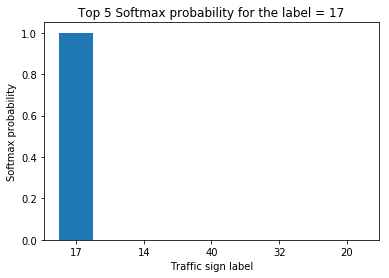

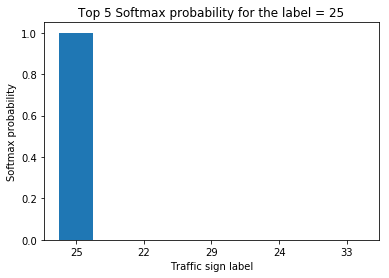

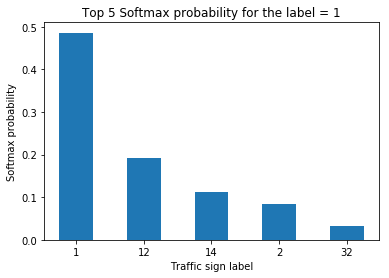

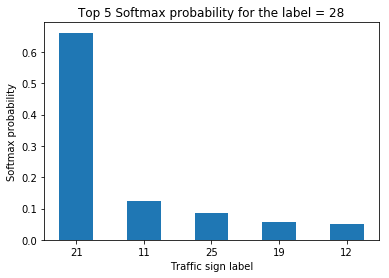

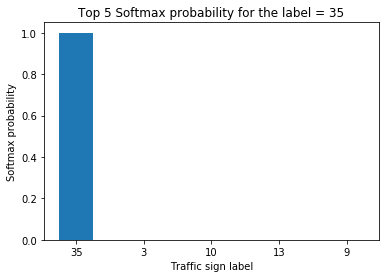

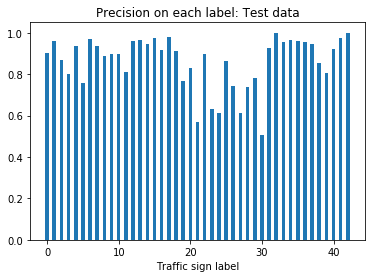

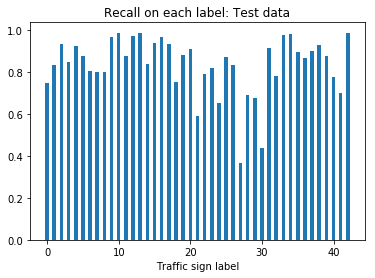

In [10]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### See above for coding of the top n softmax
print("Softmax top n: \n", softmax_n)

### (optional)- plot softmax bar chart of these 5 samples
values = softmax_n[0]
indices = softmax_n[1]
for i in range(len(values)):
    plt.figure()
    index =  np.arange( len(indices[i])  )
    plt.bar(  index, values[i], 0.5  )
    plt.xticks(  index, indices[i].astype(str)  )
    plt.xlabel("Traffic sign label")
    plt.ylabel("Softmax probability")
    plt.title("Top 5 Softmax probability for the label = " + str(labels[i]) )

    
### (optional) Precision and Recall
### Precision = Corrected prediction on this sign/All prediction on this sign
### Recll     = Corrected prediction on this sign/Total nunmber of this sample on this sign
### data: X_test, y_test
### hist: unique_test,  counts_test  = np.unique(y_test,  return_counts=True)
### prediction
y_pred = DNN.GetPrediction(X_test)
pred_result = abs(y_test-y_pred)
### Precision/Recall for each sign/label
Precision = []
Recall = []
for i in range(43):
    # index = np.where(y_pred == i)[0]
    index = (y_pred==i)
    # total predicion on this i
    N = sum(index)
    #How many correct false or 0 is if the macth label 
    i_Pos = sum(pred_result[index] == 0) 
    prec = float(i_Pos/N)
    Precision.append(prec)
    # total i label in this given sample
    index = (y_test==i)
    N = sum(index)
    recal = float(i_Pos/N)
    Recall.append(recal)
    
#plot precision and recall on each labels
plt.figure()
index =  np.arange( len(Precision)  )
plt.bar(  index, Precision, 0.5  )
#plt.xticks(  index, index.astype(str)  )
plt.xlabel("Traffic sign label")
plt.title("Precision on each label: Test data" )

plt.figure()
index =  np.arange( len(Recall)  )
plt.bar(  index, Recall, 0.5  )
#plt.xticks(  index, index.astype(str)  )
plt.xlabel("Traffic sign label")
plt.title("Recall on each label: Test data" )





---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


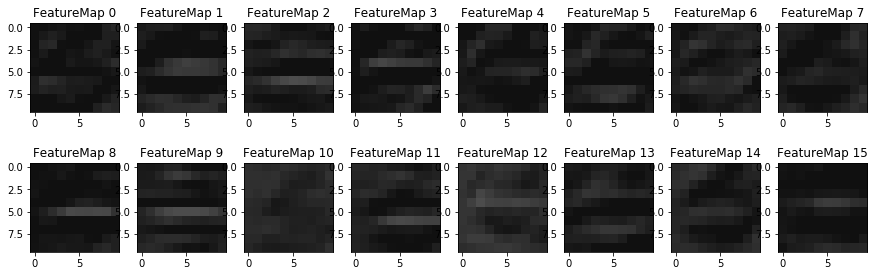

In [11]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
# See CovNetwork for feature map plotting
            
    
#feature maps: in a trained network vs a completely untrained one on the same sign image.    
#------------------------------------------------------------------------------------------------#
#untrained sign            
DNN.outputFeatureMap(features[0].reshape(1,32,32,1),"actv2",activation_min=-1, activation_max=15)
#DNN.outputFeatureMap(features[1].reshape(1,32,32,1),"actv2",activation_min=-3, activation_max=20)
#DNN.outputFeatureMap(features[2].reshape(1,32,32,1),"actv2",activation_min=-3, activation_max=6)
#DNN.outputFeatureMap(features[3].reshape(1,32,32,1),"actv2",activation_min=-4, activation_max=4)
#DNN.outputFeatureMap(features[4].reshape(1,32,32,1),"actv2",activation_min=-2, activation_max=2)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**From the output above (No enter sign), the visual output shows the feature map on each depth. So we can see it is learning the across line in side in circle.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 